In [1]:
import missingno as msno
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [2]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(14,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(14,12))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [3]:
pd.set_option('display.max_columns', None)  # Permet d'afficher toutes les colonnes
pd.set_option('display.max_rows', None)   # Permet d'afficher toutes les lignes

In [4]:
data = pd.read_csv("/content/drive/MyDrive/data_clean.csv", sep = "\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
colonnes_100g = ["energy_100g","trans-fat_100g","cholesterol_100g","fiber_100g","vitamin-a_100g","vitamin-c_100g","calcium_100g","iron_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","proteins_100g","salt_100g","sodium_100g"]

In [6]:
for colonne in colonnes_100g :
  print(colonne)
  print("Nombre de valeurs manquantes :" ,data[colonne].isna().sum())
  print("Moyenne :" , data[colonne].mean())
  print("Mediane :" , data[colonne].median())
  print("____________________________")

energy_100g
Nombre de valeurs manquantes : 0
Moyenne : 965.4355522058537
Mediane : 856.0
____________________________
trans-fat_100g
Nombre de valeurs manquantes : 0
Moyenne : 0.056137539074946695
Mediane : 0.0
____________________________
cholesterol_100g
Nombre de valeurs manquantes : 0
Moyenne : 0.016996675835043207
Mediane : 0.006
____________________________
fiber_100g
Nombre de valeurs manquantes : 0
Moyenne : 1.9373514641545317
Mediane : 1.4
____________________________
vitamin-a_100g
Nombre de valeurs manquantes : 0
Moyenne : 0.00013695245700224974
Mediane : 8.82e-05
____________________________
vitamin-c_100g
Nombre de valeurs manquantes : 0
Moyenne : 0.007273143757045809
Mediane : 0.0024784833027627
____________________________
calcium_100g
Nombre de valeurs manquantes : 0
Moyenne : 0.06695551620918634
Mediane : 0.0476004071810882
____________________________
iron_100g
Nombre de valeurs manquantes : 0
Moyenne : 0.002025544351912302
Mediane : 0.00106
__________________________

**Répartition du nutriscore**

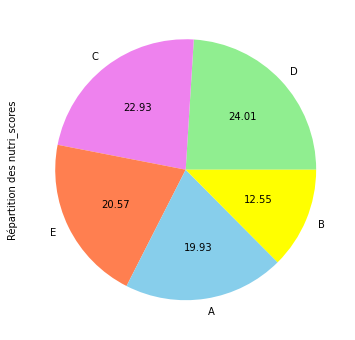

In [7]:
nutri_score = data["nutrition_grade_fr"].value_counts()
pd.Series(nutri_score)
ax = pd.Series(nutri_score).plot.pie(subplots=True, label='Répartition des nutri_scores',
     labels = ['D', 'C', 
     'E', 'A',
     'B'],
     figsize = (8, 6),
     colors = ['lightgreen', 'violet', 'coral', 'skyblue', 'yellow', 'purple'], autopct = '%.2f')

Analyse de la variable : energy_100g


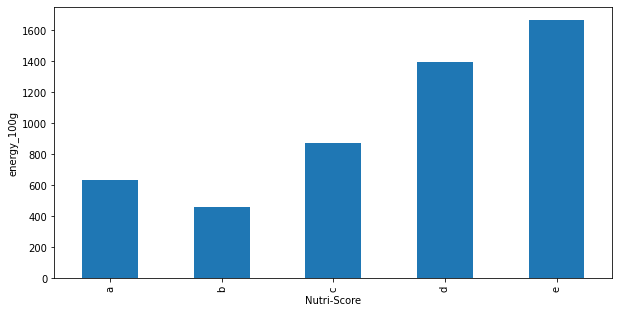

Analyse de la variable : trans-fat_100g


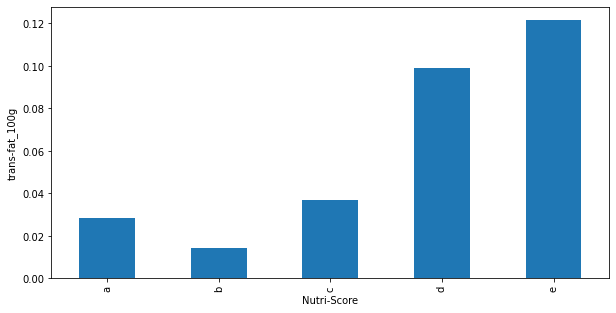

Analyse de la variable : cholesterol_100g


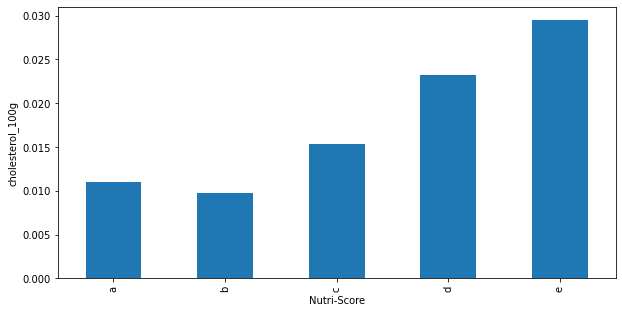

Analyse de la variable : fiber_100g


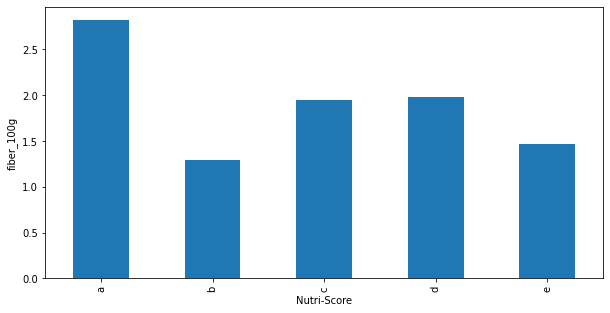

Analyse de la variable : vitamin-a_100g


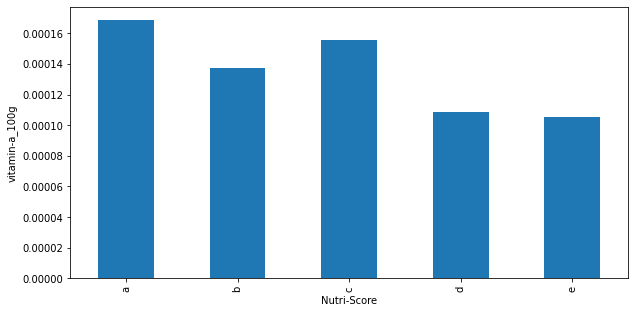

Analyse de la variable : vitamin-c_100g


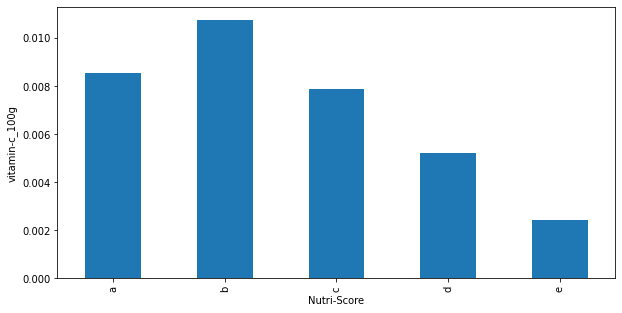

Analyse de la variable : calcium_100g


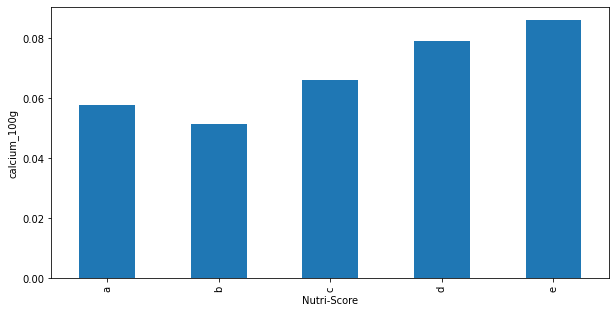

Analyse de la variable : iron_100g


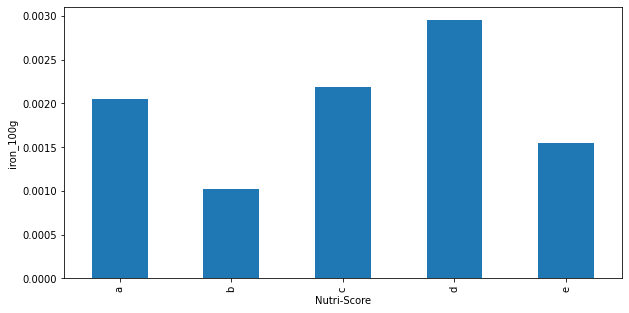

Analyse de la variable : fat_100g


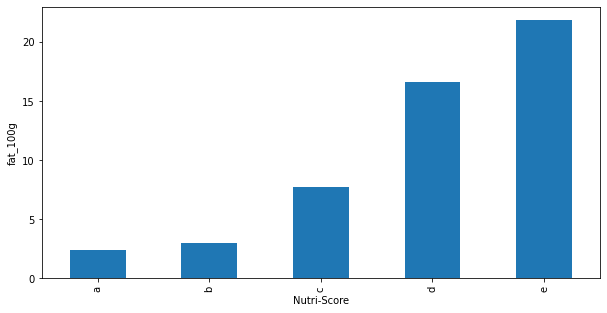

Analyse de la variable : saturated-fat_100g


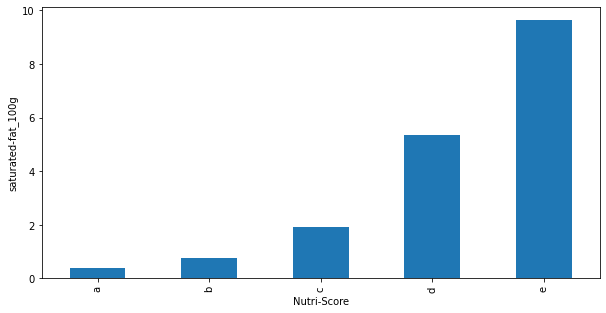

Analyse de la variable : carbohydrates_100g


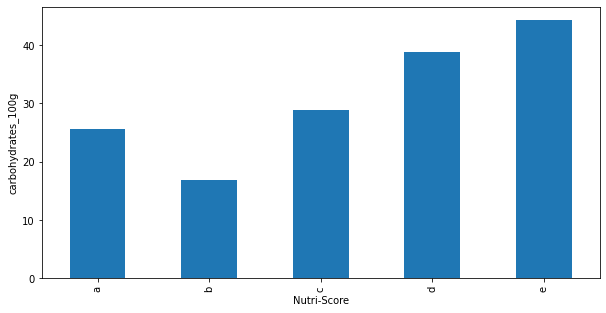

Analyse de la variable : sugars_100g


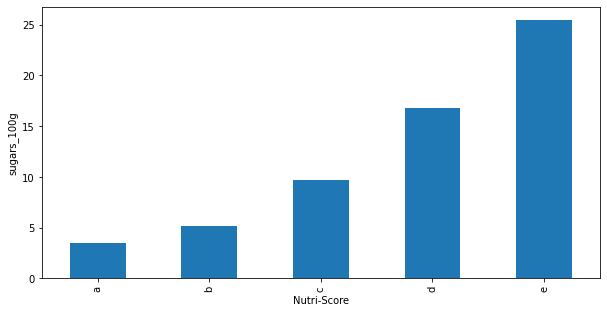

Analyse de la variable : proteins_100g


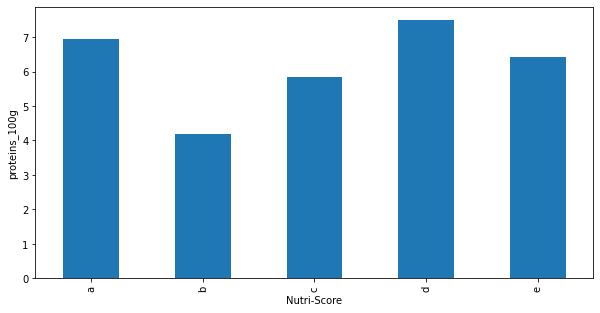

Analyse de la variable : salt_100g


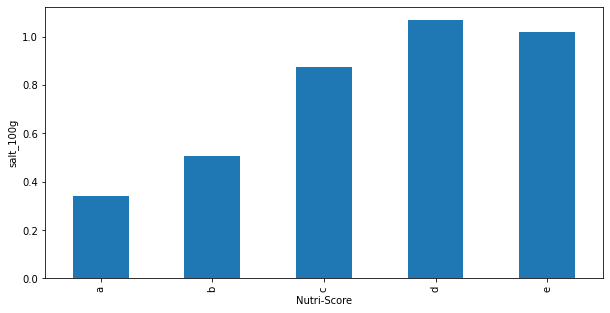

Analyse de la variable : sodium_100g


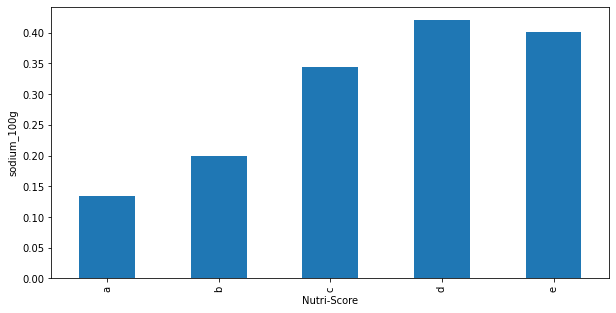

In [8]:
for colonne in colonnes_100g :
  print("Analyse de la variable :", colonne)
  data.groupby(["nutrition_grade_fr"])[colonne].mean().plot(kind="bar", figsize=(10,5), xlabel="Nutri-Score", ylabel=colonne)
  plt.show()

Analyse de la variable : energy_100g


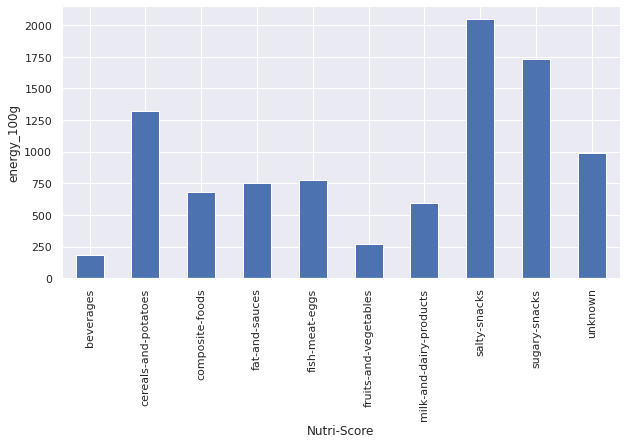

Analyse de la variable : trans-fat_100g


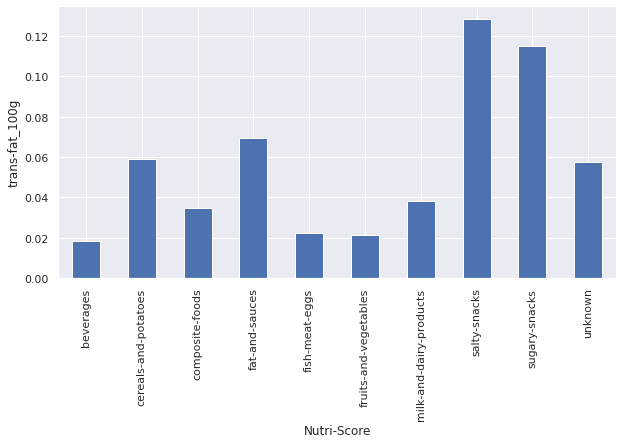

Analyse de la variable : cholesterol_100g


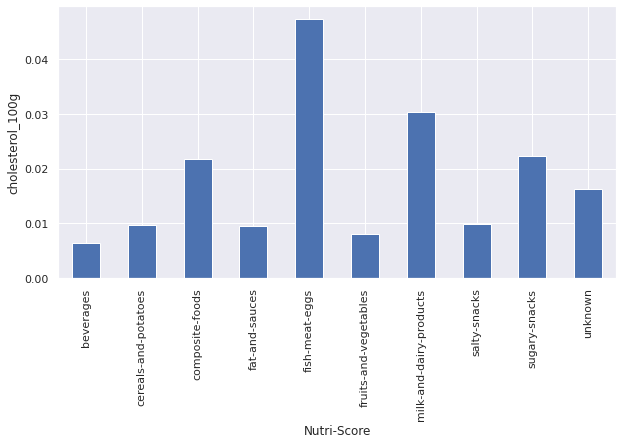

Analyse de la variable : fiber_100g


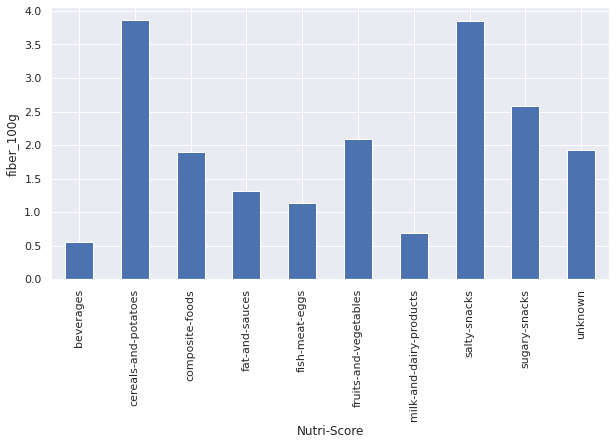

Analyse de la variable : vitamin-a_100g


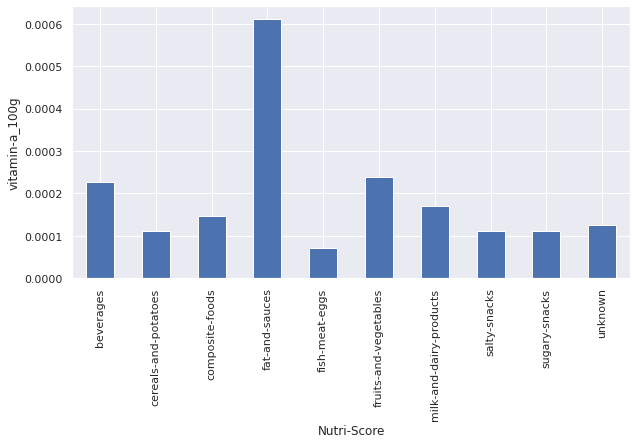

Analyse de la variable : vitamin-c_100g


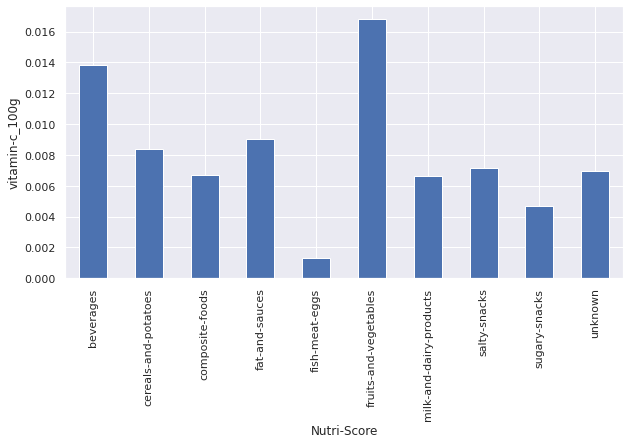

Analyse de la variable : calcium_100g


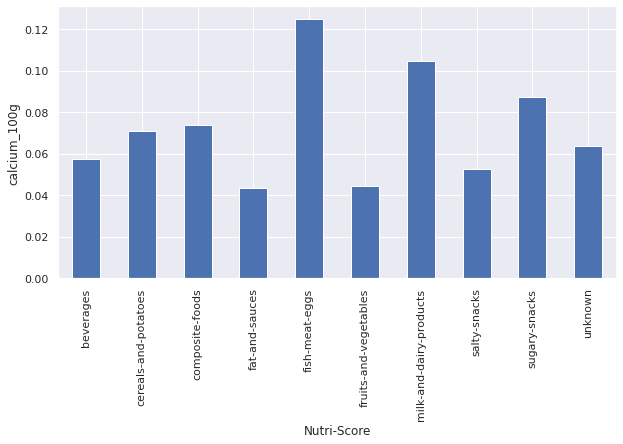

Analyse de la variable : iron_100g


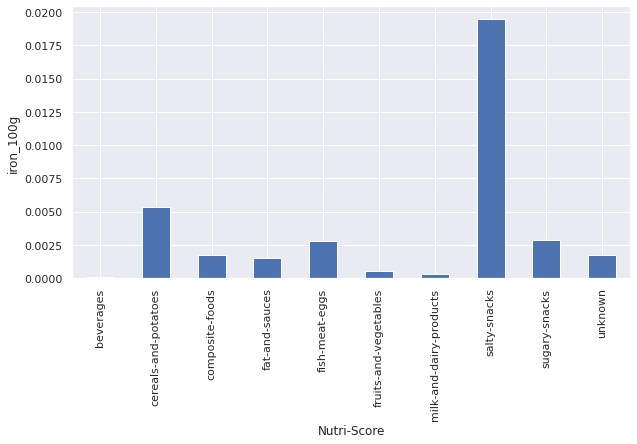

Analyse de la variable : fat_100g


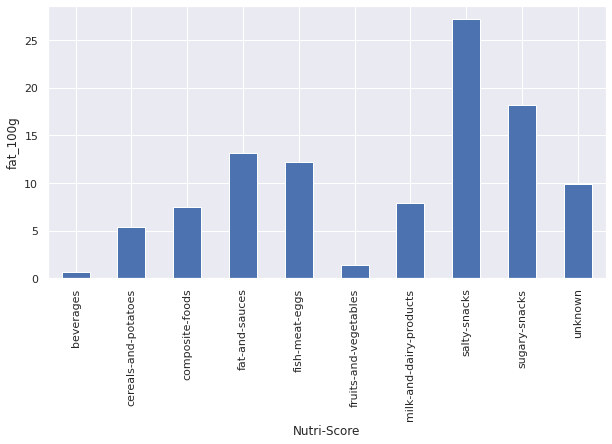

Analyse de la variable : saturated-fat_100g


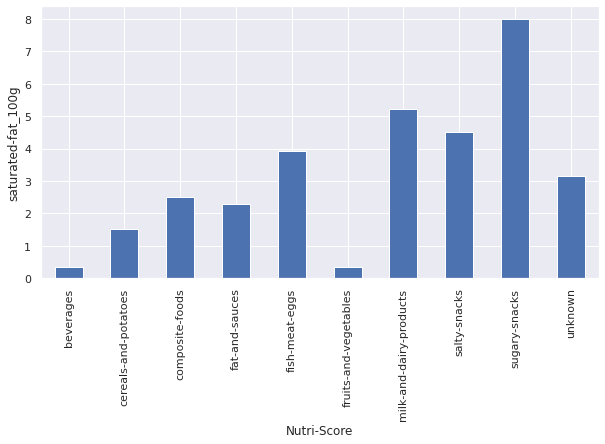

Analyse de la variable : carbohydrates_100g


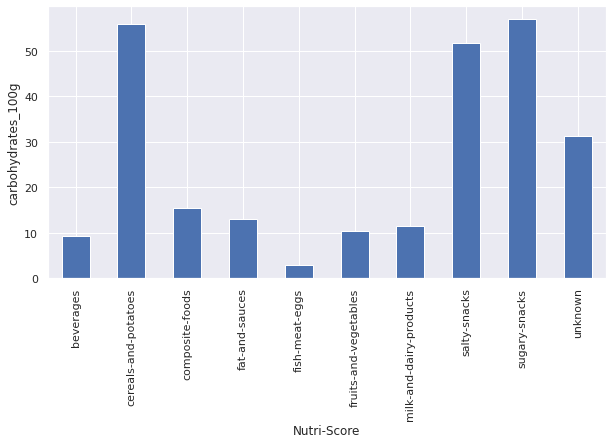

Analyse de la variable : sugars_100g


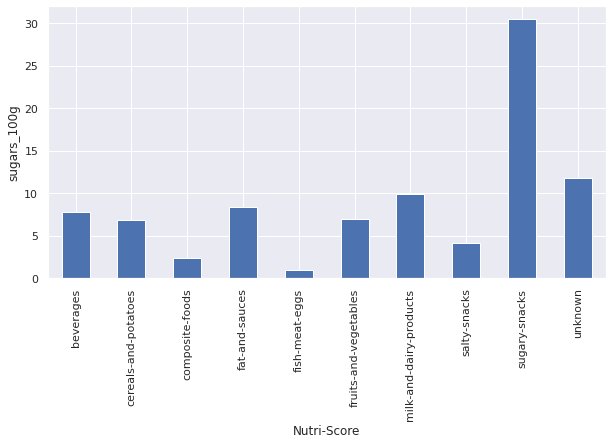

Analyse de la variable : proteins_100g


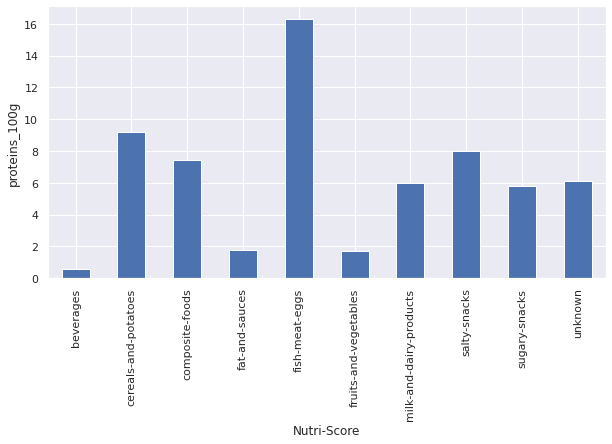

Analyse de la variable : salt_100g


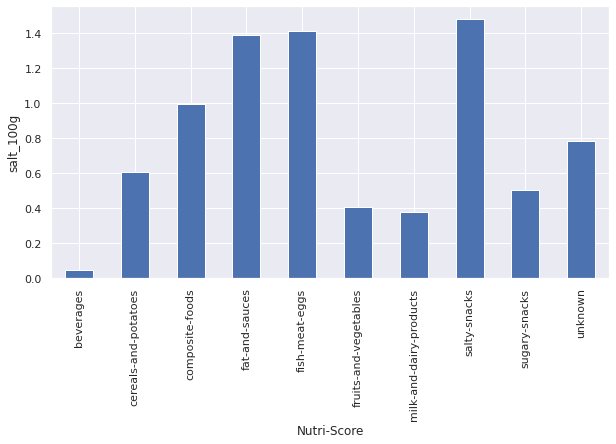

Analyse de la variable : sodium_100g


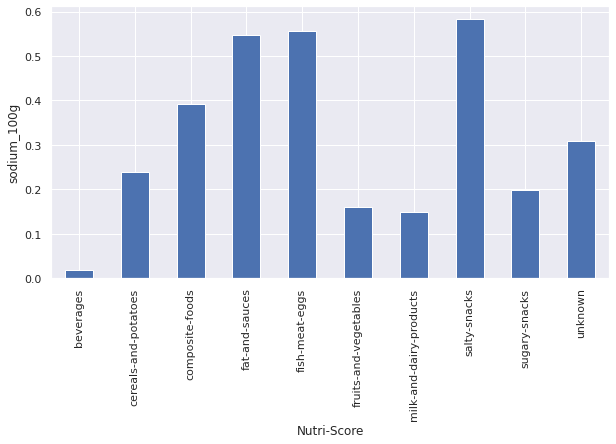

In [ ]:
for colonne in colonnes_100g :
  print("Analyse de la variable :", colonne)
  data.groupby(["pnns_groups_1"])[colonne].mean().plot(kind="bar", figsize=(10,5), xlabel="Nutri-Score", ylabel=colonne)
  plt.show()

**Matrice de corrélation**

Matrice de corrélation :
                             Unnamed: 0  additives_n  \
Unnamed: 0                     1.000000    -0.073762   
additives_n                   -0.073762     1.000000   
ingredients_from_palm_oil_n    0.189590     0.120918   
energy_100g                   -0.034713     0.117111   
fat_100g                      -0.008588     0.051282   
saturated-fat_100g             0.035846     0.121944   
trans-fat_100g                -0.001757     0.020851   
cholesterol_100g               0.012177     0.005890   
carbohydrates_100g            -0.058951     0.141912   
sugars_100g                   -0.043558     0.186620   
fiber_100g                     0.005882    -0.114750   
proteins_100g                  0.009182    -0.015471   
salt_100g                     -0.097482     0.138246   
sodium_100g                   -0.097482     0.138247   
vitamin-a_100g                 0.011708    -0.004408   
vitamin-c_100g                 0.006341    -0.007646   
calcium_100g           

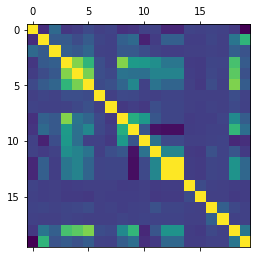

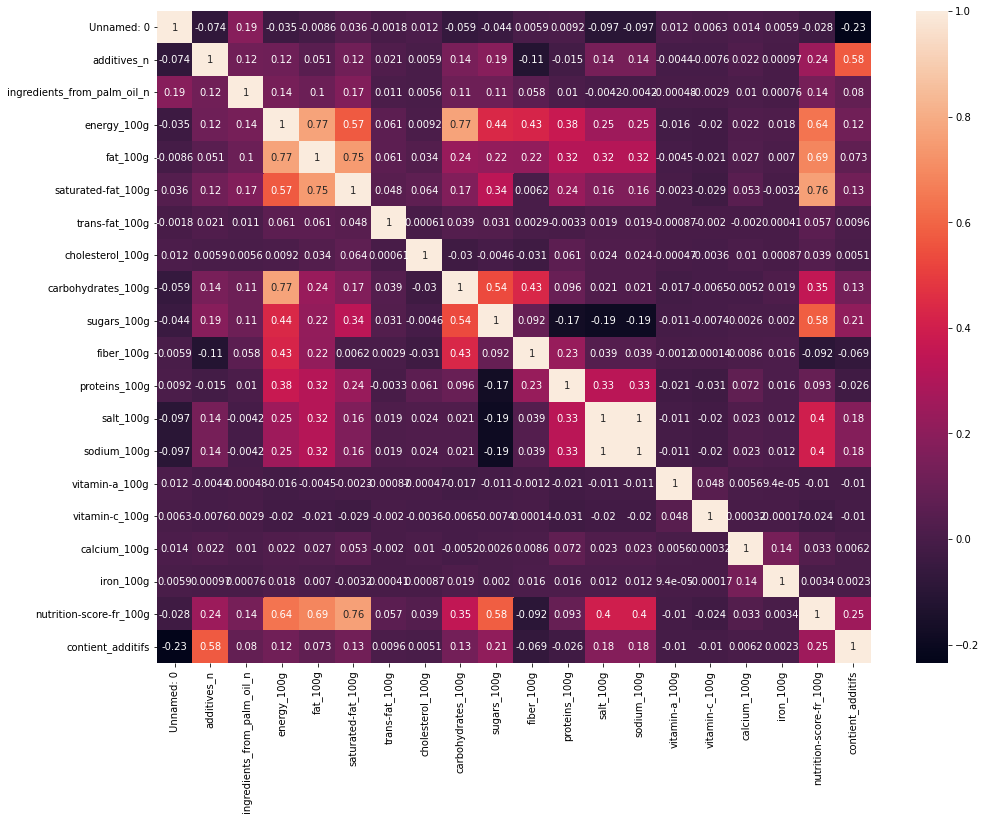

In [ ]:
corr_df = data.corr()
print("Matrice de corrélation :")
print(corr_df, "\n")

plt.matshow(corr_df)
plt.show()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

**Application de la méthode ACP** (Analyse en Composantes Principales)

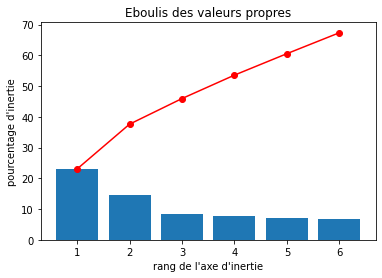

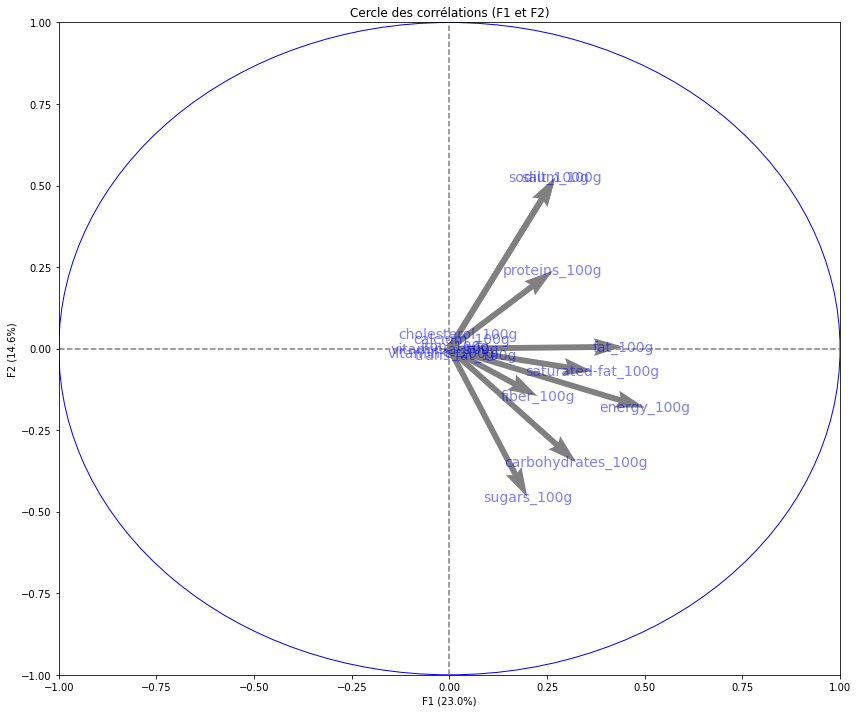

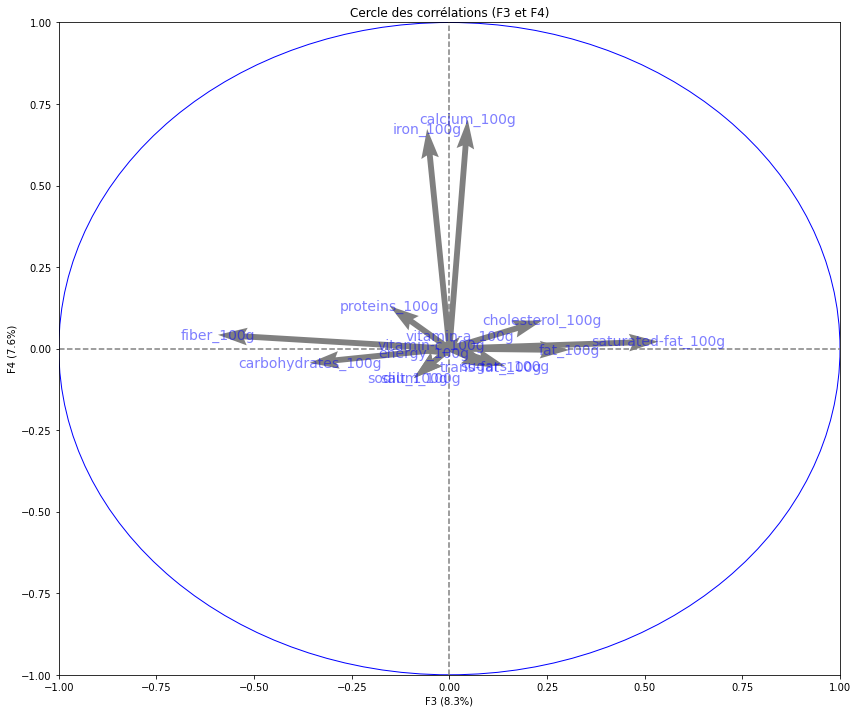

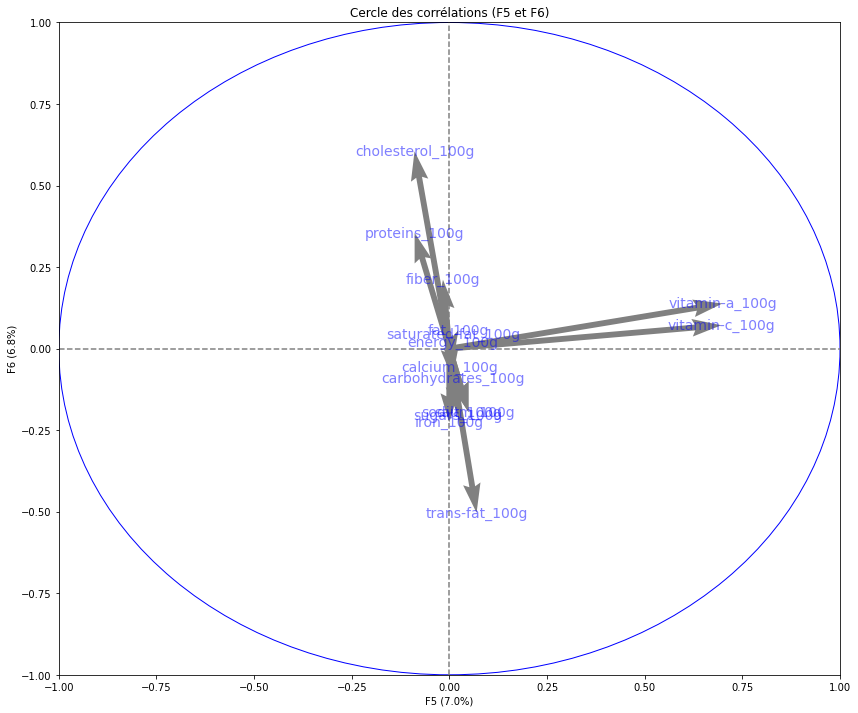

In [ ]:
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["energy_100g","fat_100g", "saturated-fat_100g","trans-fat_100g","cholesterol_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g","vitamin-a_100g","vitamin-c_100g","calcium_100g","iron_100g"]]

# préparation des données pour l'ACP
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

plt.show()

One-way ANOVA

Analyse de la variable : energy_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


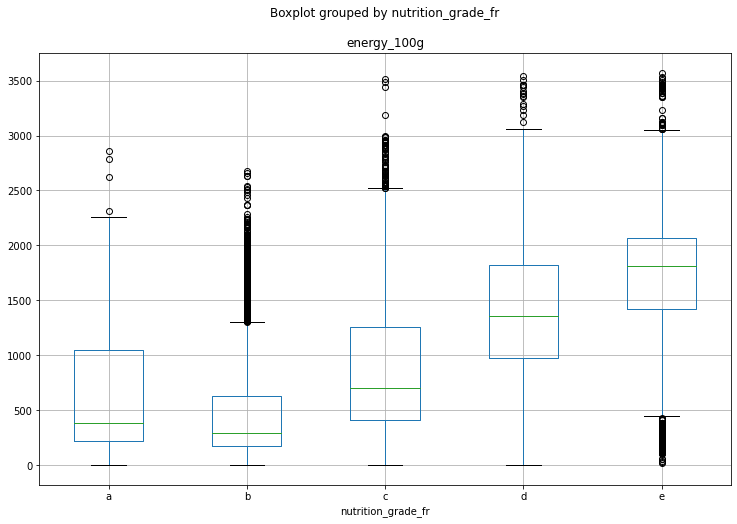

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : trans-fat_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


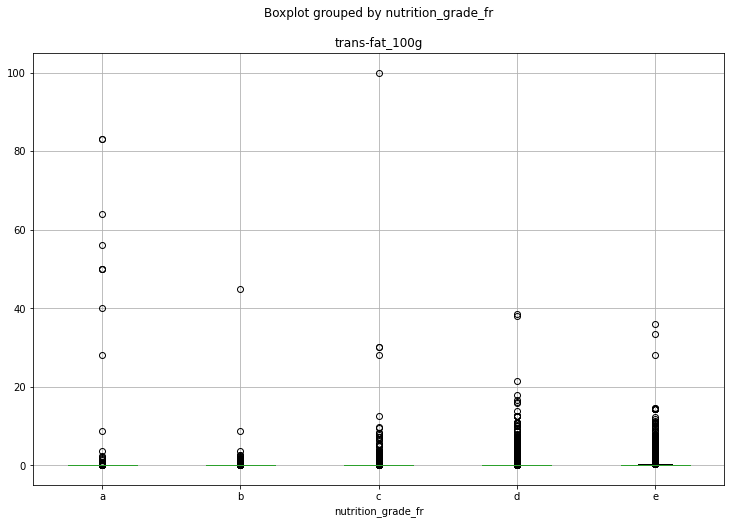

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : cholesterol_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


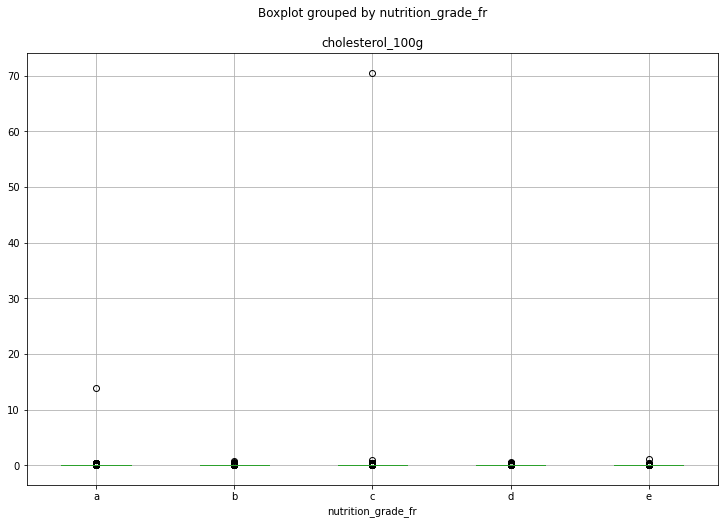

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : fiber_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


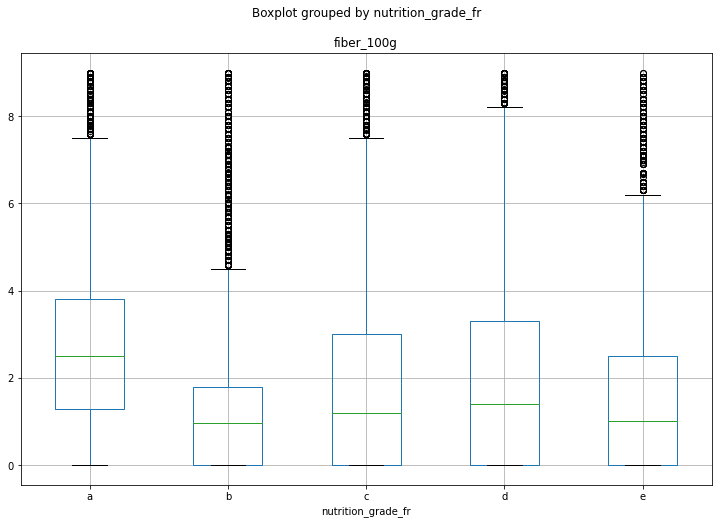

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : vitamin-a_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


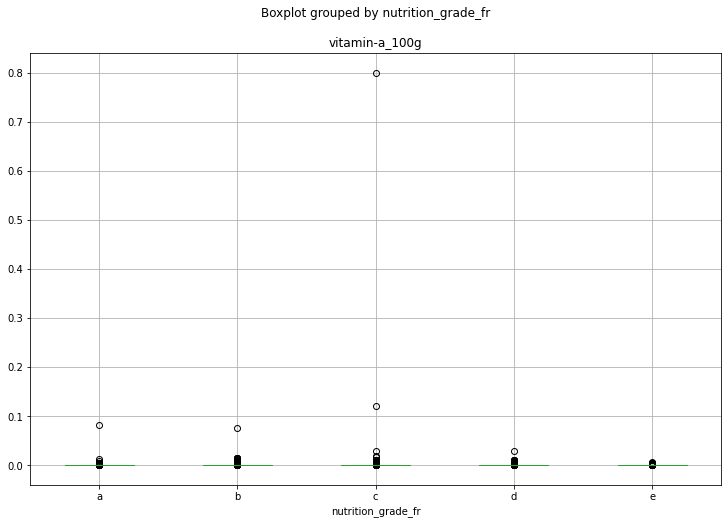

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : vitamin-c_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


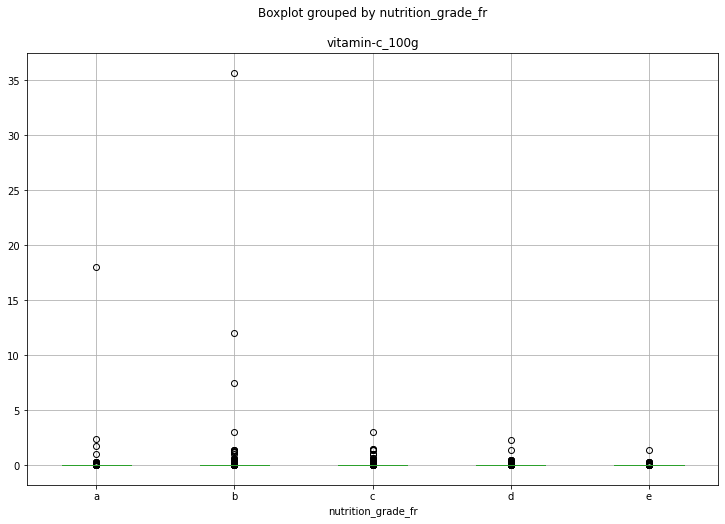

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : calcium_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


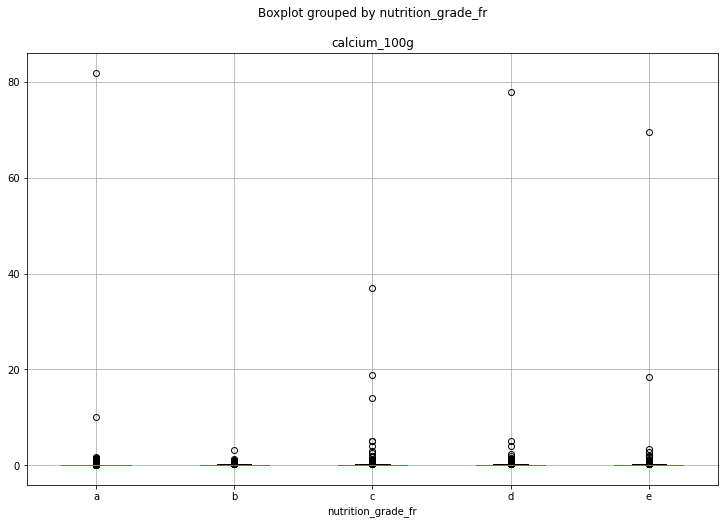

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : iron_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


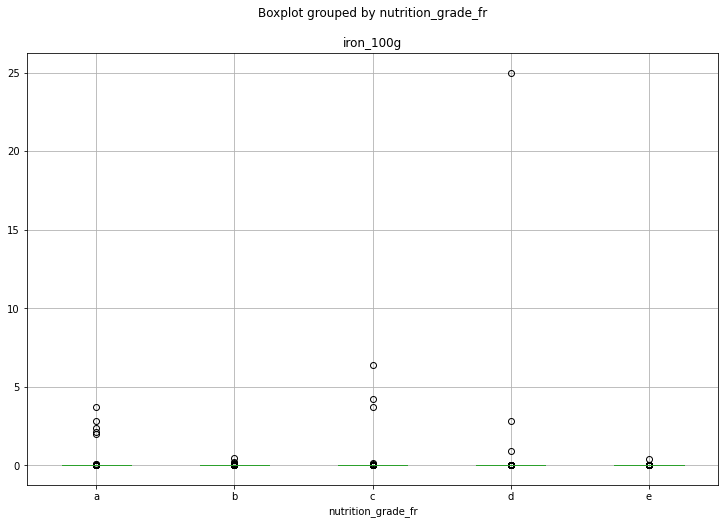

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : fat_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


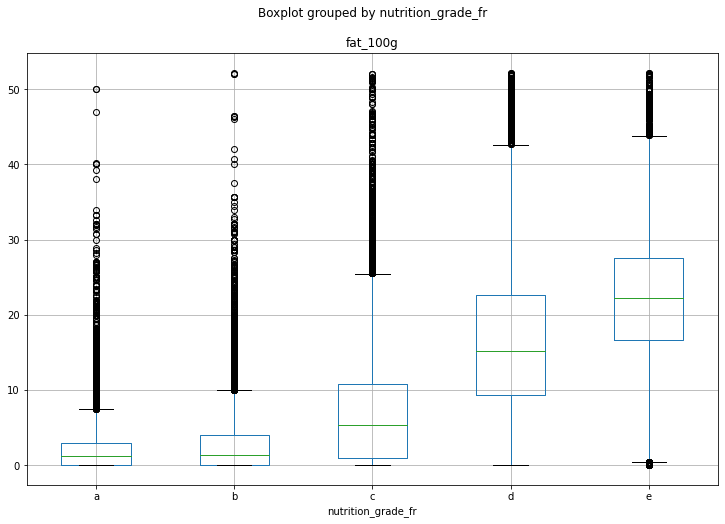

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : saturated-fat_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


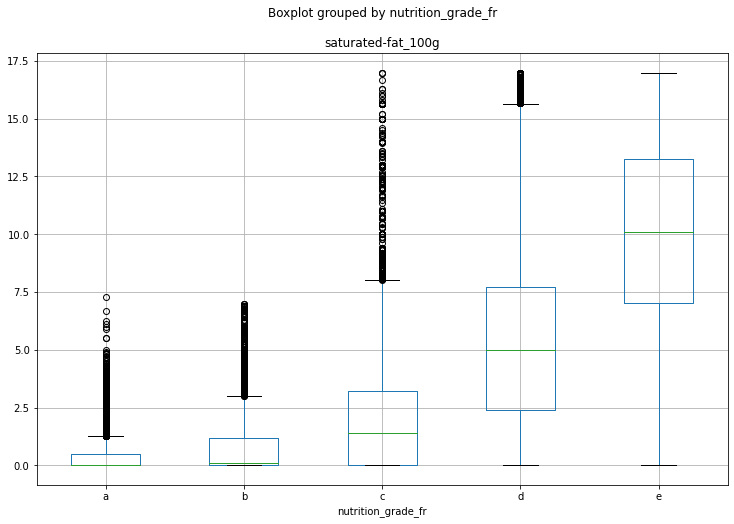

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : carbohydrates_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


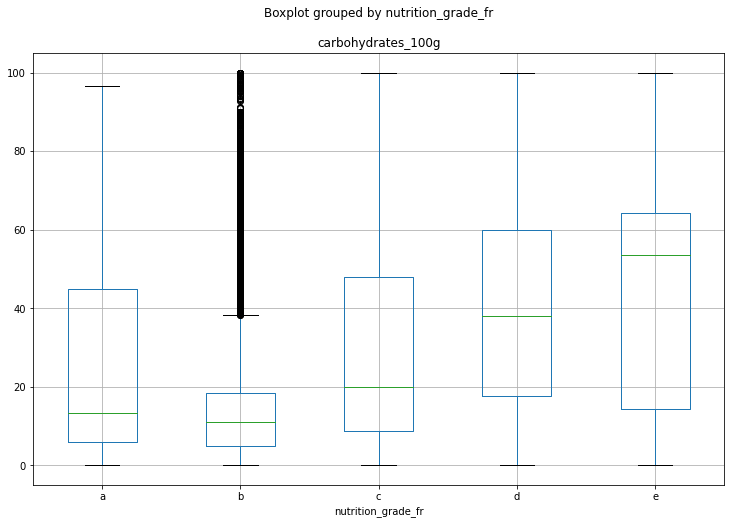

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : sugars_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


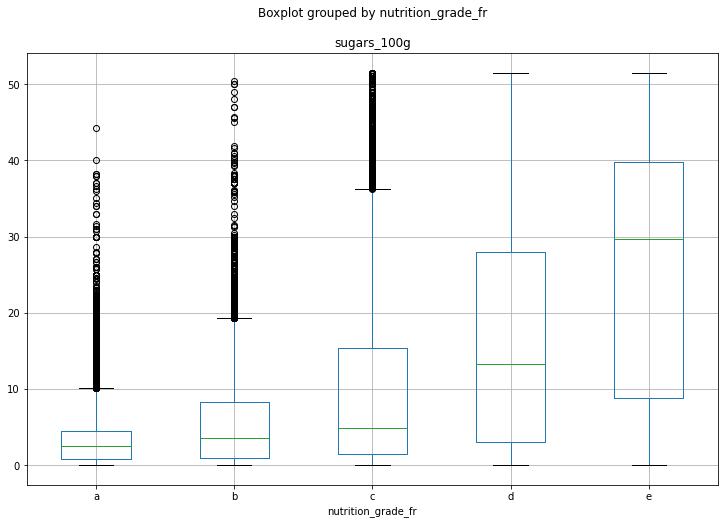

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : proteins_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


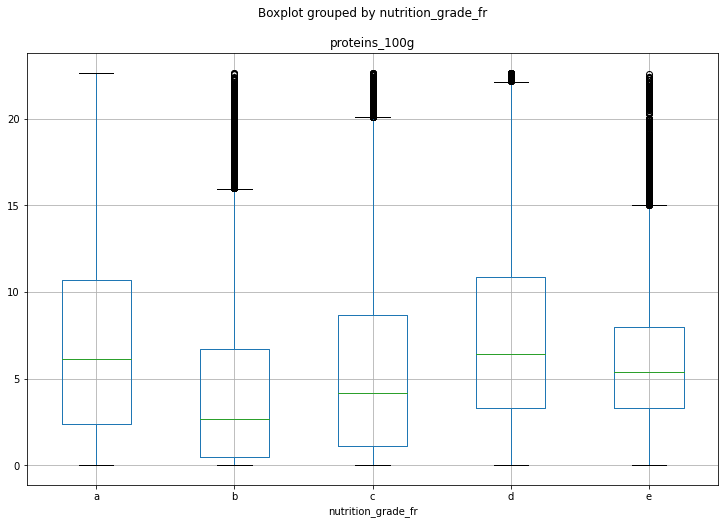

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : salt_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


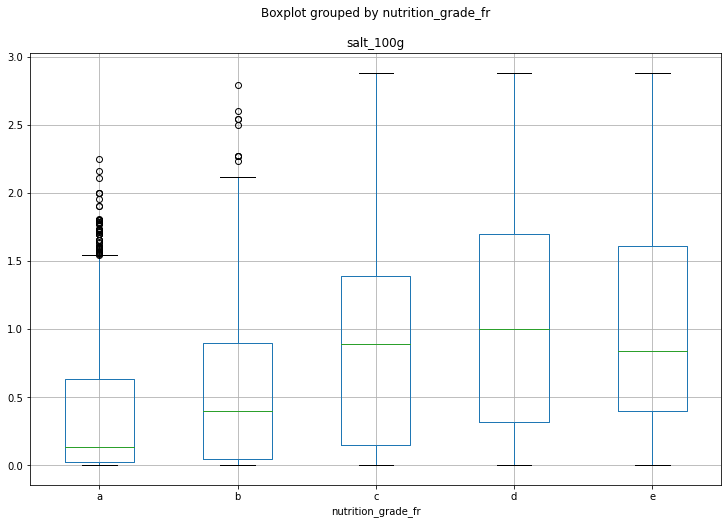

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________
Analyse de la variable : sodium_100g


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


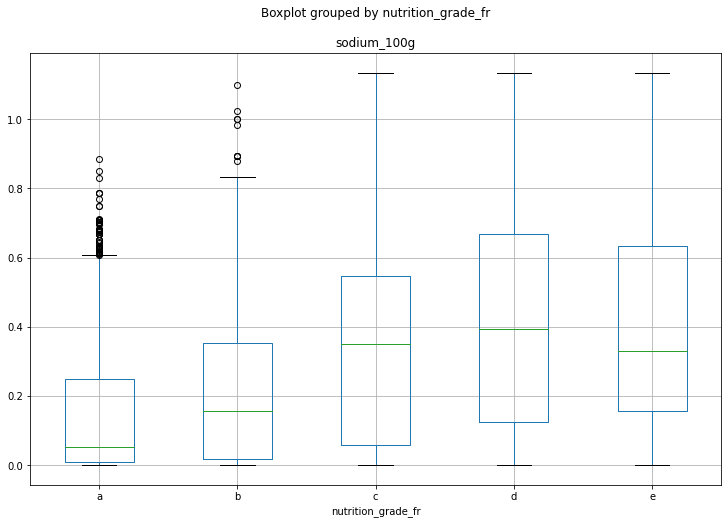

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  7.886278e+06       4.0  28412.209134     0.0
Residual            1.074883e+07  154901.0           NaN     NaN
_____________________________


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for colonne in colonnes_100g :
  print("Analyse de la variable :", colonne)
  data.boxplot(colonne, by='nutrition_grade_fr', figsize=(12,8))
  plt.show()

  mod = ols('fat_100g ~ nutrition_grade_fr',
                data=data).fit()
                
  aov_table = sm.stats.anova_lm(mod, typ=2)
  print(aov_table)

  print("_____________________________")

Analyse multivariée : Sucre - Graisse - Nutriscore

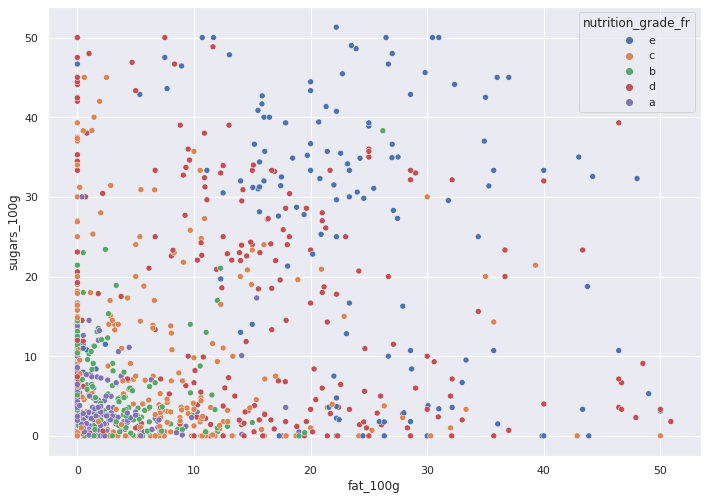

In [ ]:
data_sample = data.sample(n = 1000)

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x = data_sample["fat_100g"], y = data_sample["sugars_100g"], hue = data_sample["nutrition_grade_fr"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


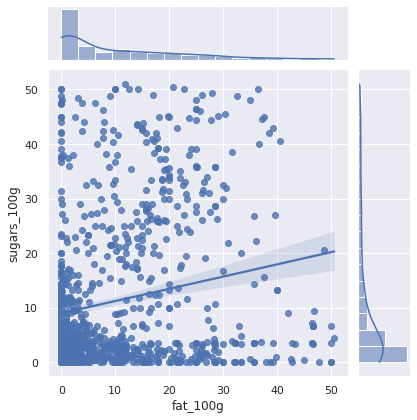

In [ ]:
sns.jointplot("fat_100g", "sugars_100g", data=data.sample(n=1000), kind='reg');